## Introduction

Coronaviruses are a broad family of viruses that may infect both animals and humans. Several coronaviruses have been linked to respiratory infections in humans, ranging from the common cold to more serious disorders including Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS) (SARS). Coronavirus illness is caused by the most recently found coronavirus. World Health Organization COVID-19

The number of new cases is growing every day all around the world. This dataset contains daily information from India's states and union territories.

## Data understanding

#### EDA: Exploring and cleaning

In [1]:
#Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressin warnings
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
# load dataset
df = pd.read_csv("covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


Data Dictionary

Sno: This column shows the entry number of Covid patients.

Date: This column shows the Date of registration of Covid patients.

Time: This column shows the registration time of Covid patients.

State/UnionTerritory: This column shows the Different state of India suffering from Covid.

ConfirmedIndianNational: This column shows Indians suffering from Covid.

ConfirmedForeignNational: This column shows Foreigners in India suffering from Covid.

Cured: This column shows patients cured from Covid.

Deaths: This column shows patients died due to Covid.

Confirmed: This column shows patients with positive results. 

In [3]:
df.shape

(2991, 9)

The function shape is used to show the number of observations, in this case, 2991 rows, and numbers of features or variable, 9 columns. 

In [4]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,2991.000000,2991.000000,2991.000000,2991.000000
mean,1496.000000,927.865597,64.840187,2202.333668
std,863.571653,3354.157599,264.954939,7548.386880
min,1.000000,0.000000,0.000000,0.000000
25%,748.500000,1.000000,0.000000,12.000000
50%,1496.000000,25.000000,1.000000,94.000000
75%,2243.500000,360.000000,17.000000,1259.000000
max,2991.000000,47796.000000,3717.000000,101141.000000


In [5]:
df.describe(include=object)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,2991,2991,2991,2991,2991
unique,136,7,40,62,12
top,11/06/20,8:00 AM,Kerala,-,-
freq,37,1353,136,2545,2545


In [6]:
duplicate_rows=df[df.duplicated()]
print('Number of duplicate rows: ',duplicate_rows.shape[0])

Number of duplicate rows:  0


It was checked the duplicates rows, in this case don`t have duplicate. 

### Checking missing values

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
missing_values=df.isnull().sum().sum()
print("Number of missing values: ", missing_values)

Number of missing values:  0


It shows if there is any missing data in any column, represented as "Fasle" and the summatory for each column. The total number of NA is 0. .

### Analysis of few columns

In [10]:
df['Confirmed'].value_counts()

1       263
2       117
7        92
3        88
33       63
       ... 
321       1
696       1
6923      1
8194      1
7984      1
Name: Confirmed, Length: 1281, dtype: int64

In [11]:
df['State/UnionTerritory'].value_counts()

Kerala                                      136
Delhi                                       104
Rajasthan                                   103
Haryana                                     102
Telengana                                   102
Uttar Pradesh                               102
Ladakh                                       99
Tamil Nadu                                   99
Karnataka                                    97
Maharashtra                                  97
Jammu and Kashmir                            97
Punjab                                       97
Andhra Pradesh                               94
Uttarakhand                                  91
Odisha                                       90
Puducherry                                   88
West Bengal                                  88
Chhattisgarh                                 87
Chandigarh                                   87
Gujarat                                      86
Madhya Pradesh                          

In [12]:
df['ConfirmedIndianNational'].value_counts()

-      2545
1       108
3        73
2        33
4        21
       ... 
41        1
86        1
87        1
45        1
110       1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [13]:
df['ConfirmedForeignNational'].value_counts()

-     2545
0      314
1       39
2       36
14      25
3       12
10       6
8        5
7        3
6        3
11       2
9        1
Name: ConfirmedForeignNational, dtype: int64

In [14]:
df['Cured'].value_counts()

0       642
1       202
2        92
3        76
7        45
       ... 
2165      1
829       1
1353      1
453       1
4206      1
Name: Cured, Length: 902, dtype: int64

In [15]:
df['Deaths'].value_counts()

0       1242
1        327
3        144
4        104
2         98
        ... 
749        1
267        1
1390       1
147        1
451        1
Name: Deaths, Length: 352, dtype: int64

In [16]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

Total Confirmed cases = 6587180
Total Cured cases = 2775246
Total Death cases = 193937


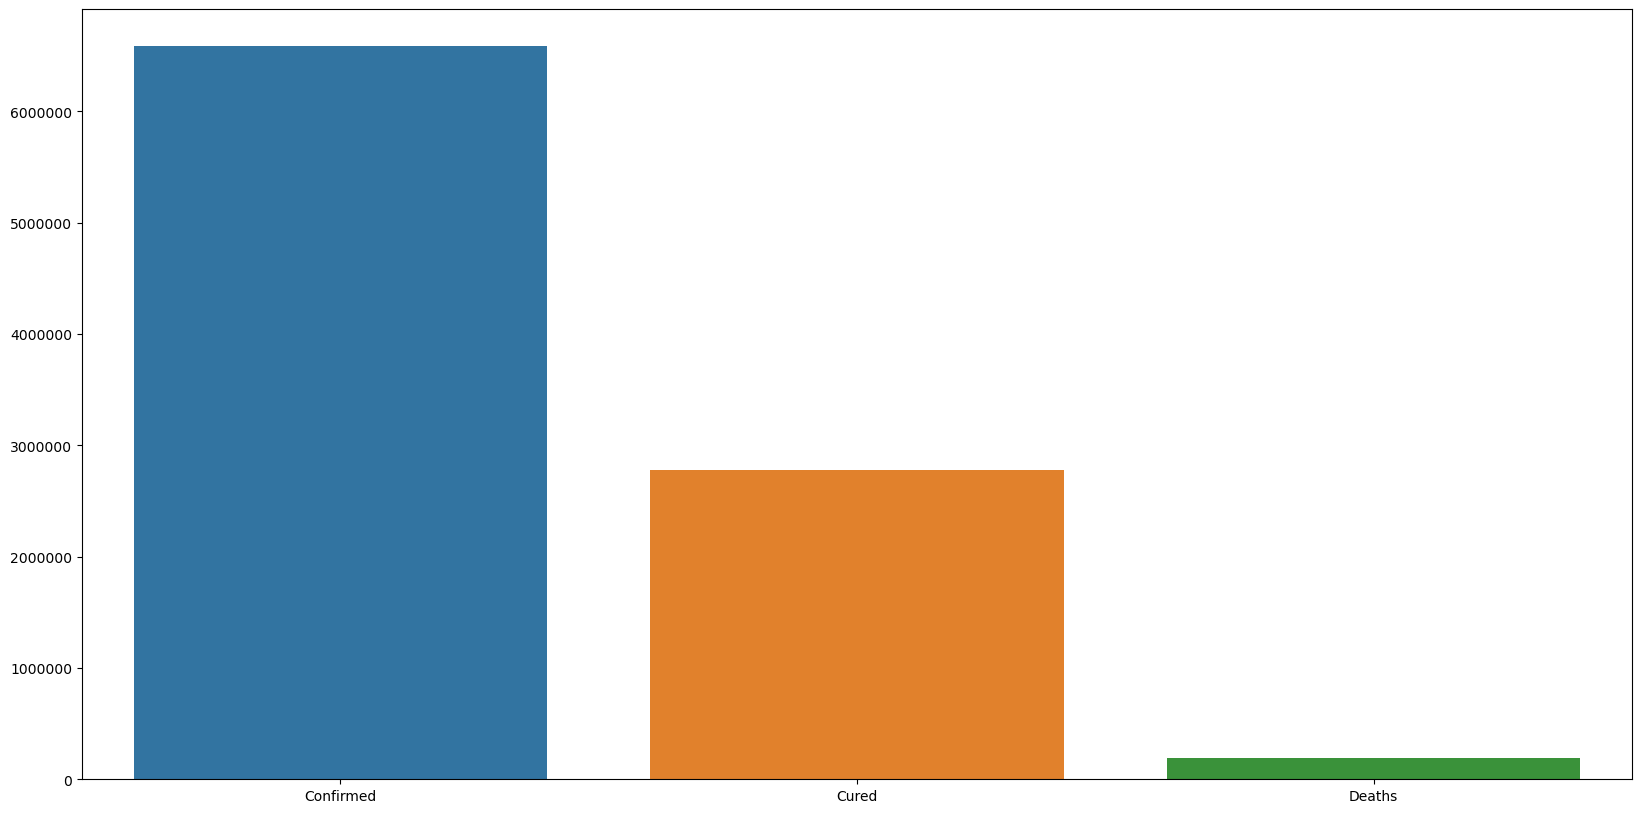

In [17]:
"""Barplot for Confirmed , Deaths , Cured"""
fig = plt.figure(figsize=(20,10))

confirm= df['Confirmed'].sum()
cured = df['Cured'].sum()
deaths= df['Deaths'].sum()

print('Total Confirmed cases =',confirm)
print('Total Cured cases =',cured)
print('Total Death cases =',deaths)

barplot = sns.barplot(x=['Confirmed','Cured','Deaths'],y=[confirm,cured,deaths])
barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))

plt.show()

The graph shows that of the people who tested positive more than 40% were cured and less than 5% of people died.

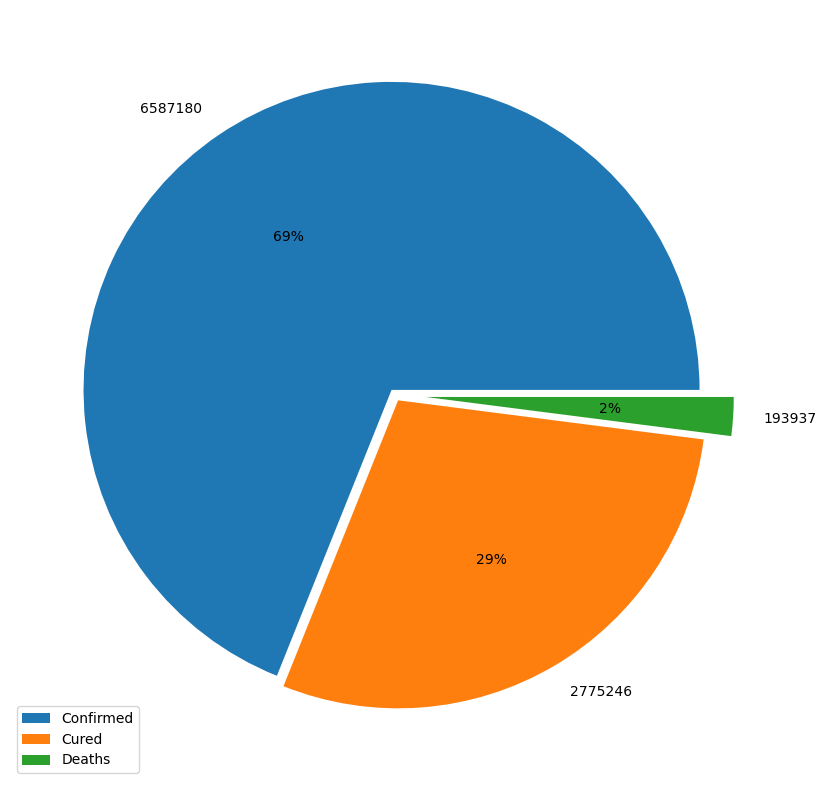

In [18]:
"Piechart for 'Confirmed','Cured', 'Deaths'"

fig = plt.figure(figsize=(17,10))
df_values = [df['Confirmed'].sum(),df['Cured'].sum(),df['Deaths'].sum()]
df_keys = [confirm,cured,deaths]


plt.pie(df_keys,labels = df_keys, explode = (0.02,0.02,0.1), autopct = '%.0f%%')
plt.legend(['Confirmed','Cured','Deaths'])

<AxesSubplot:xlabel='Deaths', ylabel='Density'>

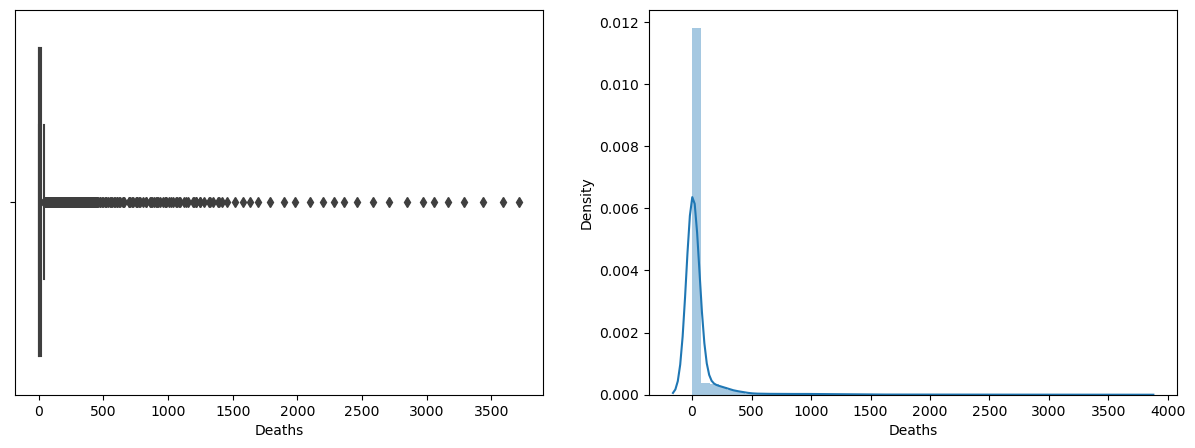

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(df['Deaths'])
plt.subplot(122)
sns.distplot(df['Deaths'])

<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

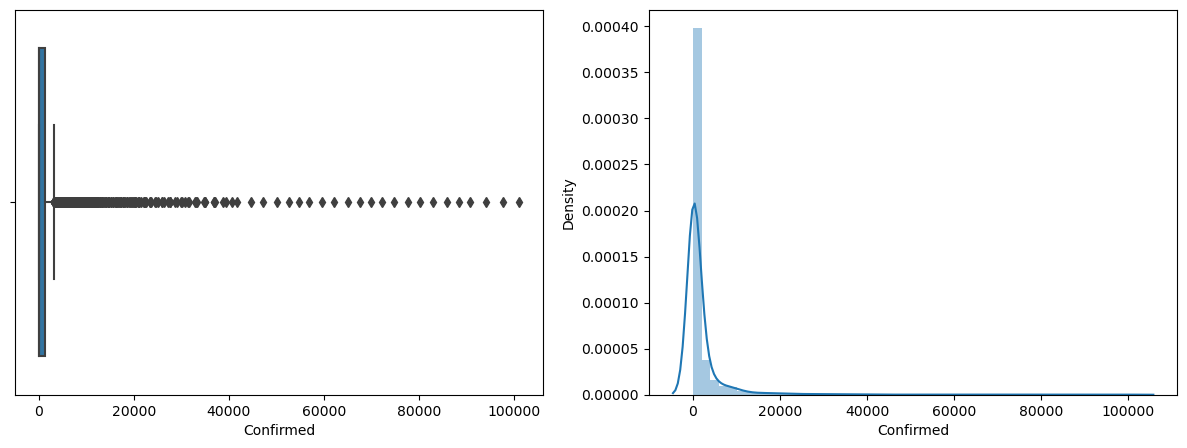

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(df['Confirmed'])
plt.subplot(122)
sns.distplot(df['Confirmed'])

<AxesSubplot:xlabel='Cured', ylabel='Density'>

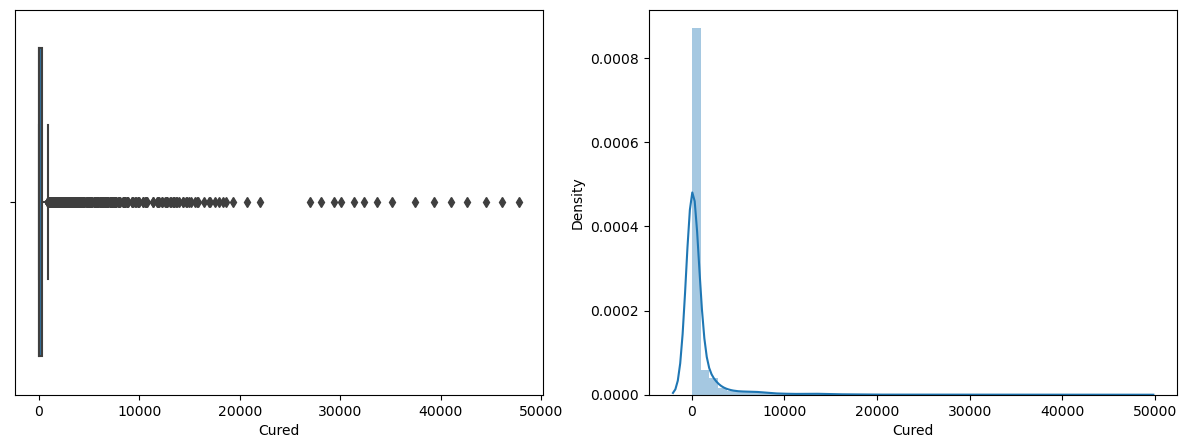

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(df['Cured'])
plt.subplot(122)
sns.distplot(df['Cured'])

Text(0, 0.5, 'Deaths')

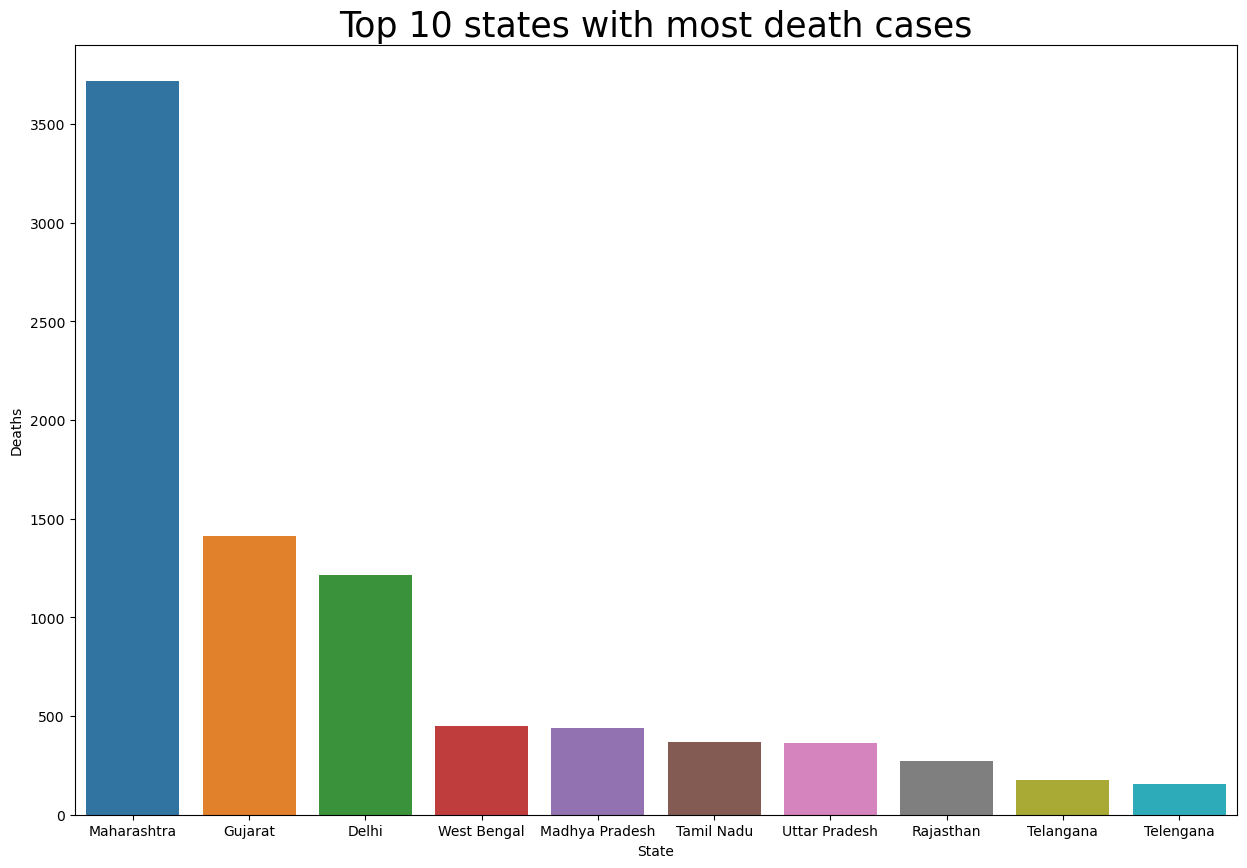

In [22]:
top_10_death_cases = df.groupby(by = 'State/UnionTerritory').max()[['Deaths' , 'Date']].sort_values(by='Deaths',ascending = False).reset_index()
fig = plt.figure(figsize=(15,10))
ax = sns.barplot(data = top_10_death_cases.iloc[:10], y='Deaths', x='State/UnionTerritory')
plt.title('Top 10 states with most death cases',size = 25)
plt.xlabel('State')
plt.ylabel('Deaths')

# Correlations


The correlation coefficient is not the best way to express a feature's "relevance," but it does offer us an indication of potential linkages within the data. Some general meanings of the correlation coefficient's absolute value are:

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”

In [23]:
df.corr()

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.318217,0.244275,0.299630
Cured,0.318217,1.000000,0.911367,0.967410
Deaths,0.244275,0.911367,1.000000,0.942594
Confirmed,0.299630,0.967410,0.942594,1.000000


Text(0.5, 0.98, 'Correlation Matrix')

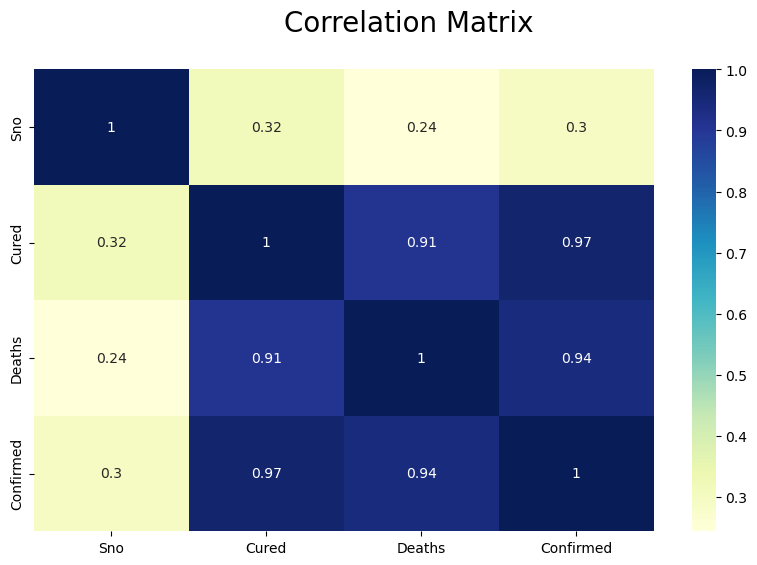

In [24]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.suptitle('Correlation Matrix', fontsize = 20)

In [25]:
# Find correlations with the target and sort
correlations = df.corr()['Confirmed'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))

Most Positive Correlations:
 Sno          0.299630
Deaths       0.942594
Cured        0.967410
Confirmed    1.000000
Name: Confirmed, dtype: float64


Let's look at some of the most notable correlations: The greatest favorable association is the Cured. (Except for Target(Confirmed), because a variable's correlation with itself is always one!) Cured shows patients cured from Covid.


# Encoding the Categorical data


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy import random

In [27]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
0,30/01/20,6:00 PM,Kerala,1,0
1,31/01/20,6:00 PM,Kerala,1,0
2,01/02/20,6:00 PM,Kerala,2,0
3,02/02/20,6:00 PM,Kerala,3,0
4,03/02/20,6:00 PM,Kerala,3,0


In [28]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df_categorical=df_categorical.apply(le.fit_transform)
df_categorical.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
0,129,2,19,2,1
1,133,2,19,2,1
2,0,2,19,21,1
3,5,2,19,31,1
4,10,2,19,31,1


In [29]:
#Separating the hotel and the target
X = df_categorical['Date']
y = df['Confirmed']

# TRAINING WITH SKLEARN.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy import random

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.3, random_state=42)

In [33]:
df['Confirmed'].value_counts()

1       263
2       117
7        92
3        88
33       63
       ... 
321       1
696       1
6923      1
8194      1
7984      1
Name: Confirmed, Length: 1281, dtype: int64

In [34]:
y_test.value_counts()

1       89
2       39
7       23
3       20
33      15
        ..
7233     1
7998     1
341      1
1039     1
272      1
Name: Confirmed, Length: 491, dtype: int64

In [35]:
y_train.value_counts()

1        174
2         78
7         69
3         68
33        48
        ... 
6532       1
2281       1
5804       1
14053      1
2647       1
Name: Confirmed, Length: 977, dtype: int64

DUMMIE
training with dummies helps set a foundation for others. all values worse than the dummies should not even be considered.

With this I must check the values of the following:

LINEAR REGRESSION

RANDON FOREST


All scores were better than dummies, this shows reliability with them.

In [36]:
##Train to Dummie (Baseline)
Cld = DummyClassifier(strategy= 'most_frequent')
Cld.fit(X_train,y_train)
Cld.score(X_test,y_test)

0.09910913140311804

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [40]:
lr.predict(np.array([[2020-7-19]]))

array([[-5850.09003301]])

# Random Forest

In [41]:
#Train to Random Forest Classifier with 100 diferents tree
SEED=123123
random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size =0.3)

In [42]:
cls = RandomForestClassifier(n_estimators=100)
cls.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


RandomForestClassifier()

In [43]:
cls.predict(np.array([[2020-7-19]]))

array([1], dtype=int64)

# Conclusion

In this study I did the characterization of the dataset: size; number of attributes; has/does not have missing values, number of observations, etc.

I used the Data Preparation/Evaluation Methods Application and Exploratory Data Analysis Views.

I introduced sizing and feature engineering as needed, detailing the decisions and rationale behind the chosen techniques

Talking about Machine Learning models, I used 2 differents models: Random Forest and Linear Regression, but the model that had the best-balanced result and presented the best computational cost was the Random Forest model with an array 1. 